In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

Epoch 1/500
26/26 [==============================] - 3s 15ms/step - loss: 1.0939 - val_loss: 1.0677
Epoch 2/500
26/26 [==============================] - 0s 7ms/step - loss: 1.0883 - val_loss: 1.0677
Epoch 3/500
26/26 [==============================] - 0s 7ms/step - loss: 1.0959 - val_loss: 1.0677
Epoch 4/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0930 - val_loss: 1.0676
Epoch 5/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0893 - val_loss: 1.0676
Epoch 6/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0893 - val_loss: 1.0676
Epoch 7/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0948 - val_loss: 1.0676
Epoch 8/500
26/26 [==============================] - 0s 8ms/step - loss: 1.0963 - val_loss: 1.0676
Epoch 9/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0886 - val_loss: 1.0676
Epoch 10/500
26/26 [==============================] - 0s 7ms/step - loss: 1.0987 - val_loss: 1.0676
Epoch 11

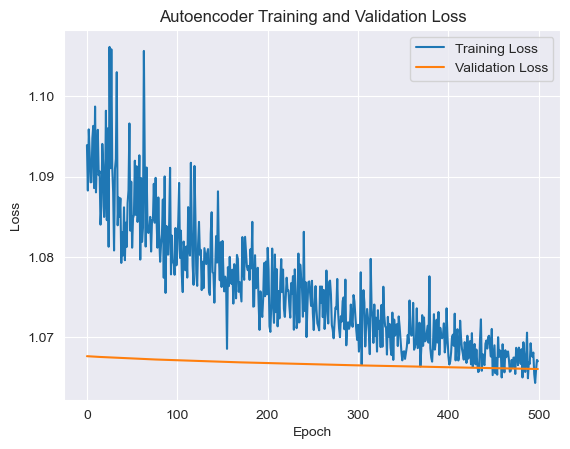

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Generate random dataset
num_samples = 255
num_features = 300
np.random.seed(0)
random_data = np.random.uniform(low=-2, high=2, size=(num_samples, num_features))

# Split the data into training and testing sets
train_data, test_data = train_test_split(random_data, test_size=0.2, random_state=0)

# Scale the input data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Define the autoencoder model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(num_features,),
                activity_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu', activity_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_features))

# Compile the autoencoder
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='mse')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the autoencoder
history = model.fit(
    train_data,
    train_data,
    epochs=500,
    batch_size=32,
    validation_data=(test_data, test_data),
    callbacks=[early_stopping]
)

# Evaluate the performance on the testing set
test_loss = model.evaluate(test_data, test_data)
print("Testing loss:", test_loss)

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()



In [24]:

# Obtain the reduced-dimensional representations
encoder = Sequential(model.layers[:4])
encoded_data = encoder.predict(random_data)

print(f"la data fue reducida a la dimensión {pd.DataFrame(encoded_data).shape}")

8/8 [==============================] - 0s 1ms/step
la data fue reducida a la dimensión (255, 16)


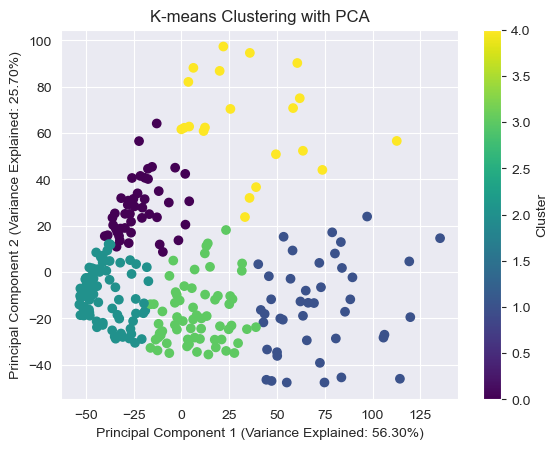

In [25]:
#Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(encoded_data)

variance_ratio = pca.explained_variance_ratio_

#Apply K-means clustering on the reduced-dimensional representations
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(pca_data)

#Plot the scatter plot
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1 (Variance Explained: {:.2%})'.format(variance_ratio[0]))
plt.ylabel('Principal Component 2 (Variance Explained: {:.2%})'.format(variance_ratio[1]))
plt.title('K-means Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()

# Alternativa con clustering jerárquico

In [15]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    pd.DataFrame(linkage_matrix)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

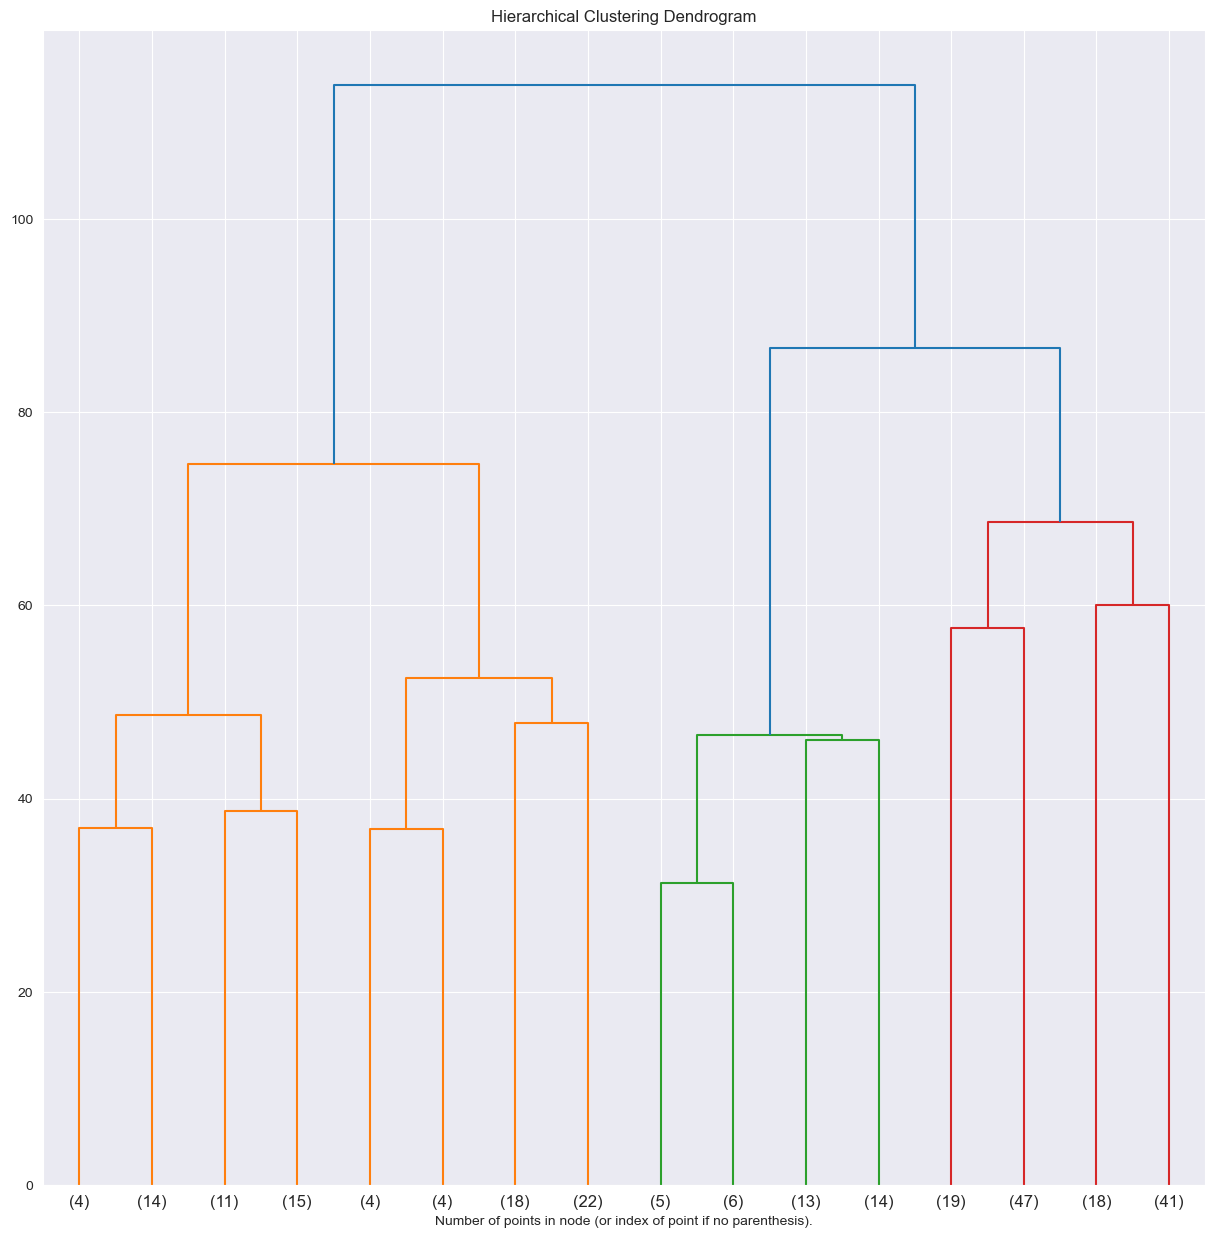

In [16]:
# Perform hierarchical clustering on the reduced-dimensional representations
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(encoded_data)

# Plot the dendrogram
plt.figure(figsize=(15,15))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
##################

In [10]:

# Generate random dataset
num_samples = 255
num_features = 300
random_data = np.random.uniform(low=-2, high=2, size=(num_samples, num_features))

# Define the autoencoder model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(num_features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_features))

# Compile and train the autoencoder
model.compile(optimizer='adam', loss='mse')
model.fit(random_data, random_data, epochs=50, batch_size=32)

# Obtain the reduced-dimensional representations
encoder = Sequential(model.layers[:4])
encoded_data = encoder.predict(random_data)

# Apply hierarchical clustering with Manhattan distance
clustering = AgglomerativeClustering(linkage='single', affinity='euclidean')
clusters = clustering.fit_predict(encoded_data)
# Perform PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(encoded_data)

# Plot the scatter plot
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()


import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate random dataset
num_samples = 255
num_features = 300
random_data = np.random.uniform(low=-2, high=2, size=(num_samples, num_features))

# Define the autoencoder model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(num_features,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_features))

# Compile and train the autoencoder
model.compile(optimizer='adam', loss='mse')
history = model.fit(random_data, random_data, epochs=500, batch_size=16)

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Obtain the reduced-dimensional representations
encoder = Sequential(model.layers[:4])
encoded_data = encoder.predict(random_data)
print(f"la data fue reducida a la dimensión {pd.DataFrame(encoded_data).shape}")

# Perform PCA for dimensionality reduction
#pca = PCA(n_components=2)
#pca_data = pca.fit_transform(encoded_data)

#variance_ratio = pca.explained_variance_ratio_

# Apply K-means clustering on the reduced-dimensional representations
#kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
#clusters = kmeans.fit_predict(pca_data)

# Plot the scatter plot
#plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
#plt.xlabel('Principal Component 1 (Variance Explained: {:.2%})'.format(variance_ratio[0]))
#plt.ylabel('Principal Component 2 (Variance Explained: {:.2%})'.format(variance_ratio[1]))
#plt.title('K-means Clustering with PCA')
#plt.colorbar(label='Cluster')
#plt.show()

from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram_data = dendrogram(linkage_matrix, no_plot=True)
    indices = dendrogram_data['leaves']
    grouped_indices = []

    for label in dendrogram_data['ivl']:
        if label.startswith('('):
            group_count = int(label.strip('()'))
            group_indices = indices[:group_count]
            grouped_indices.append(group_indices)
            indices = indices[group_count:]

    print("Indices of observations grouped at each node:", grouped_indices)
    # for i, group_indices in enumerate(grouped_indices):
    #     print("Node {}: {}".format(i+1, group_indices))

    dendrogram(linkage_matrix, **kwargs)



Epoch 1/50
8/8 [==============================] - 1s 2ms/step - loss: 1.3434
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 1.3265
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 1.3193
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 1.3104
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 1.2977
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 1.2815
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 1.2621
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 1.2404
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 1.2168
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 1.1949
Epoch 11/50
8/8 [==============================] - 0s 2ms/step - loss: 1.1726
Epoch 12/50
8/8 [==============================] - 0s 2ms/step - loss: 1.1508
Epoch 13/50
8/8 [==============================] - 0s 2ms/step - loss: 1.

NameError: name 'AgglomerativeClustering' is not defined